In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([ 15.,  43., 127., 169., 215., 212., 118.,  67.,  20.,  14.]),
 array([-2.7229088 , -2.14167628, -1.56044376, -0.97921125, -0.39797873,
         0.18325379,  0.76448631,  1.34571883,  1.92695135,  2.50818387,
         3.08941639]),
 <a list of 10 Patch objects>)

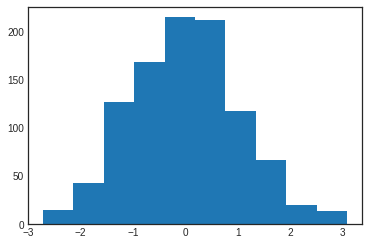

In [2]:
plt.hist(data)

(array([0.00516145, 0.02580723, 0.04645301, 0.07742168, 0.03613012,
        0.10839036, 0.14452048, 0.2271036 , 0.28387951, 0.24774939,
        0.2942024 , 0.33033252, 0.32000962, 0.4077542 , 0.38194697,
        0.2942024 , 0.44388432, 0.35613974, 0.21678071, 0.2271036 ,
        0.16516626, 0.16516626, 0.11871325, 0.06193735, 0.03613012,
        0.03096867, 0.03613012, 0.03096867, 0.03096867, 0.01032289]),
 array([-2.7229088 , -2.52916463, -2.33542046, -2.14167628, -1.94793211,
        -1.75418794, -1.56044376, -1.36669959, -1.17295542, -0.97921125,
        -0.78546707, -0.5917229 , -0.39797873, -0.20423455, -0.01049038,
         0.18325379,  0.37699797,  0.57074214,  0.76448631,  0.95823048,
         1.15197466,  1.34571883,  1.539463  ,  1.73320718,  1.92695135,
         2.12069552,  2.3144397 ,  2.50818387,  2.70192804,  2.89567221,
         3.08941639]),
 <a list of 1 Patch objects>)

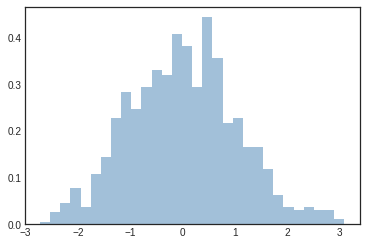

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

(array([0.01010196, 0.00673464, 0.01346927, 0.01346927, 0.02357123,
        0.02693855, 0.02693855, 0.03367319, 0.0538771 , 0.0538771 ,
        0.06734637, 0.07071369, 0.07744833, 0.12122347, 0.13806006,
        0.15826398, 0.21550839, 0.18856984, 0.22897767, 0.16163129,
        0.21214107, 0.16499861, 0.18183521, 0.1986718 , 0.14816202,
        0.16163129, 0.12459079, 0.0909176 , 0.10438688, 0.08081565,
        0.05050978, 0.03030587, 0.03030587, 0.03367319, 0.03030587,
        0.01683659, 0.00336732, 0.00673464, 0.        , 0.00673464]),
 array([-2.9134063 , -2.61643411, -2.31946191, -2.02248972, -1.72551753,
        -1.42854533, -1.13157314, -0.83460095, -0.53762875, -0.24065656,
         0.05631563,  0.35328782,  0.65026002,  0.94723221,  1.2442044 ,
         1.5411766 ,  1.83814879,  2.13512098,  2.43209318,  2.72906537,
         3.02603756,  3.32300976,  3.61998195,  3.91695414,  4.21392634,
         4.51089853,  4.80787072,  5.10484292,  5.40181511,  5.6987873 ,
         5.99575

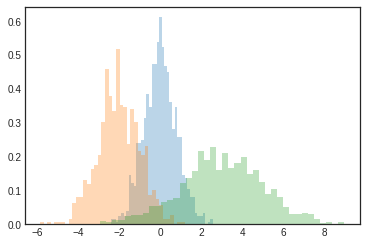

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [5]:
counts, bin_edges = np.histogram(data, bins=5) # 简单的计算频次直方图（计算每段区间的样本数）
counts

array([ 58, 296, 427, 185,  34])

# 二维频次直方图与数据区间划分

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

## 1. plt.hist2d：二维频次直方图

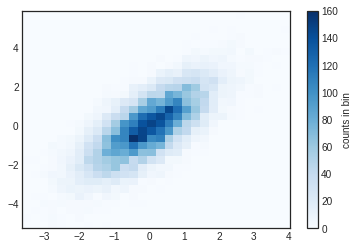

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30) # 与np.histogram类似

## 2. plt.hexbin：六边形区间划分

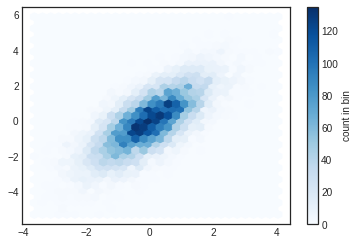

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## 3. 核密度估计

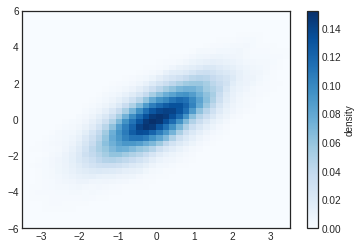

In [10]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')